In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

In [2]:
def read_log(path):
    with open(path, 'r') as f:
        log = f.read()
    sandbox_logs_section, activities_log_section, trade_history_section = log.split('\n\n\n\n')
    sandbox_logs_section = sandbox_logs_section.split('Sandbox logs:\n')[1]
    activities_log_section = activities_log_section.split('Activities log:\n')[1]
    trade_history_section = trade_history_section.split('\nTrade History:\n[\n  ')[1].split('\n]')[0]

    return process_sandbox_logs(sandbox_logs_section), process_activities_log(activities_log_section), process_trade_history(trade_history_section)

In [3]:
def process_sandbox_logs(sandbox_logs_section):
    # Initialize an empty list to hold the parsed dictionaries
    data_dicts = []
    
    # Split the section into individual JSON strings
    entries = sandbox_logs_section.strip().split('\n}\n{')
    
    # Preprocess to ensure proper JSON format
    entries = [entry if entry.endswith('}') else entry + '}' for entry in entries]
    entries = ['{' + entry if not entry.startswith('{') else entry for entry in entries]
    
    # Parse each JSON string and append the resulting dictionary to our list
    for entry in entries:
        try:
            # Fixing the individual JSON strings if needed
            corrected_entry = entry.replace('\n}\n{', '}\n{')
            data_dict = json.loads(corrected_entry)
            data_dicts.append(data_dict)
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON: {e}")
            print(f"Faulty entry: {entry}")

    # Convert the list of dictionaries into a DataFrame
    df = pd.DataFrame(data_dicts)
    
    return df

In [4]:
def process_activities_log(activities_log_section):
    return pd.read_csv(StringIO(activities_log_section), sep=';')

In [5]:
def process_trade_history(trade_history_section):
    # Step 1: Transform into a valid JSON array format
    # Enclose the entire string in square brackets and ensure commas are correctly placed
    json_array_str = '[{}]'.format(trade_history_section)
    json_array_str = json_array_str.replace('}\n  {', '},\n  {')
    
    # Step 2: Parse the JSON array
    try:
        trades_list = json.loads(json_array_str)
    except json.JSONDecodeError as e:
        print(f"Error parsing JSON: {e}")
        # Return an empty DataFrame in case of an error
        return pd.DataFrame()
    
    # Step 3: Convert the list of dictionaries to a DataFrame
    df_trades = pd.DataFrame(trades_list)
    
    return df_trades

In [25]:
PATH = 'logs/round_2/1.log'
sandbox, activities, trade_history = read_log(PATH)

In [27]:
sandbox['lambdaLog'].iloc[0]

'(plainValueObservations: {}, conversionObservations: {"ORCHIDS": {"py/object": "datamodel.ConversionObservation", "bidPrice": 1097.5, "askPrice": 1099.0, "transportFees": 0.9, "exportTariff": 10.5, "importTariff": -5.0, "sunlight": 2100.0, "humidity": 70.0}})'

In [9]:
activities[activities['product'] == 'ORCHIDS']

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
1,1,0,ORCHIDS,1094,10,1093.0,3.0,1086.0,41.0,1102,10,1104.0,3.0,1111.0,41.0,1098.0,0.0
4,1,100,ORCHIDS,1094,6,1093.0,2.0,1087.0,51.0,1102,6,1103.0,2.0,1110.0,51.0,1098.0,0.0
7,1,200,ORCHIDS,1093,6,1092.0,3.0,1085.0,49.0,1101,6,1102.0,3.0,1108.0,49.0,1097.0,0.0
11,1,300,ORCHIDS,1093,10,1092.0,4.0,1085.0,52.0,1101,10,1102.0,4.0,1109.0,52.0,1097.0,0.0
13,1,400,ORCHIDS,1093,10,1092.0,3.0,1086.0,51.0,1101,10,1102.0,3.0,1109.0,51.0,1097.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2986,1,99500,ORCHIDS,1067,5,1066.0,4.0,1060.0,43.0,1074,5,1075.0,4.0,1082.0,43.0,1070.5,0.0
2988,1,99600,ORCHIDS,1068,7,1067.0,2.0,1061.0,46.0,1075,7,1076.0,2.0,1083.0,46.0,1071.5,0.0
2991,1,99700,ORCHIDS,1068,5,1067.0,3.0,1061.0,48.0,1076,5,1077.0,3.0,1083.0,48.0,1072.0,0.0
2996,1,99800,ORCHIDS,1068,8,1067.0,3.0,1061.0,49.0,1075,8,1076.0,3.0,1083.0,49.0,1071.5,0.0


In [23]:
sandbox['lambdaLog'].iloc[10]

'traderData: {"bids": {"AMETHYSTS": [9998, 10002, 9996, 9995, 9998, 9998, 9996, 9996, 9996, 9996], "STARFRUIT": [5036, 5042, 5037, 5042, 5037, 5037, 5041, 5036, 5036, 5036]}, "asks": {"AMETHYSTS": [10005, 10004, 10004, 10005, 10004, 10004, 10004, 10004, 10000, 9998], "STARFRUIT": [5043, 5043, 5043, 5044, 5044, 5042, 5044, 5043, 5039, 5043]}}\nObservations: (plainValueObservations: {}, conversionObservations: {})\nBuy Order depth : 2, Sell order depth : 2\nAcceptable price : 10000\nBUY 10x 9998\nSELL -20x 10002\nBuy Order depth : 2, Sell order depth : 1\nBUY 16x 5039\nSELL -20x 5042'

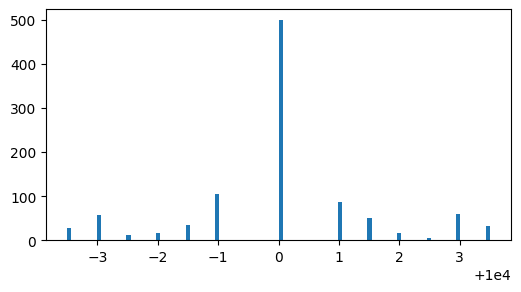

In [8]:
plt.figure(figsize=(6, 3))
plt.hist(activities[activities['product'] == 'AMETHYSTS']['mid_price'], bins=100)
plt.show()

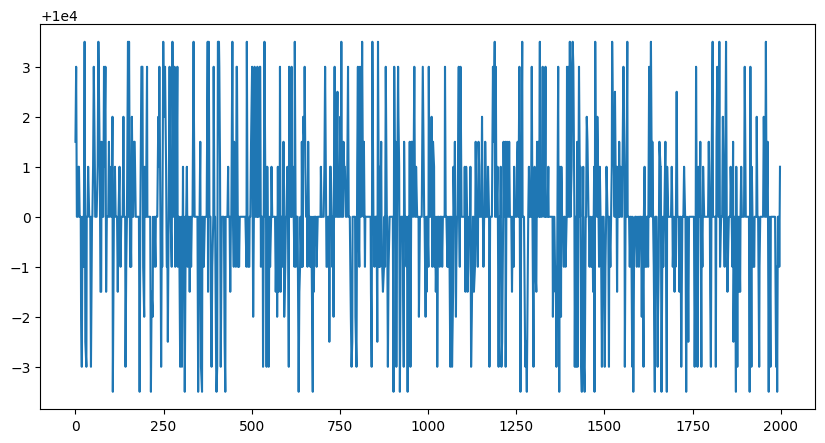

In [8]:
plt.figure(figsize=(10, 5))
plt.plot(activities[activities['product'] == 'AMETHYSTS']['mid_price'])
plt.show()

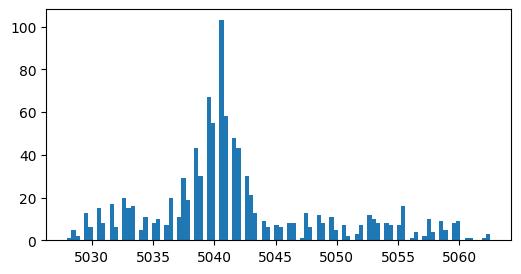

In [9]:
plt.figure(figsize=(6, 3))
plt.hist(activities[activities['product'] == 'STARFRUIT']['mid_price'], bins=100)
plt.show()

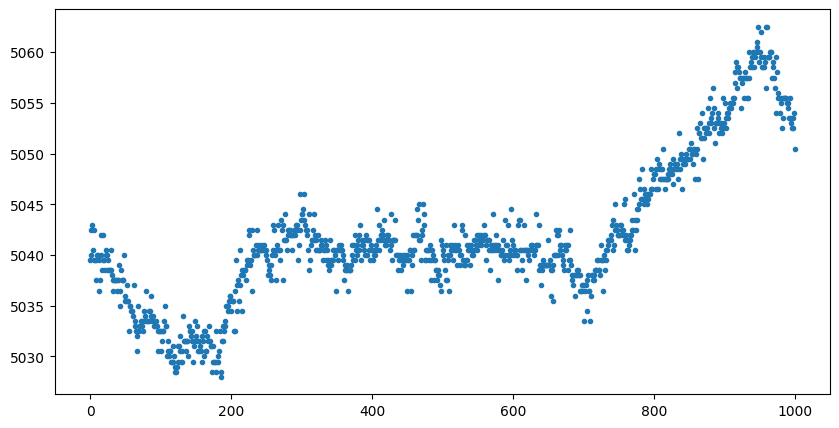

In [10]:
plt.figure(figsize=(10, 5))
plt.scatter(range(activities[activities['product'] == 'STARFRUIT'].shape[0]), activities[activities['product'] == 'STARFRUIT']['mid_price'], marker='.')
plt.show()

In [11]:
activities[activities['product'] == 'AMETHYSTS']['mid_price'].min(), activities[activities['product'] == 'AMETHYSTS']['mid_price'].max()

(9996.5, 10003.5)

In [12]:
activities[activities['product'] == 'STARFRUIT']['mid_price'].min(), activities[activities['product'] == 'STARFRUIT']['mid_price'].max()

(5028.0, 5062.5)

<Axes: >

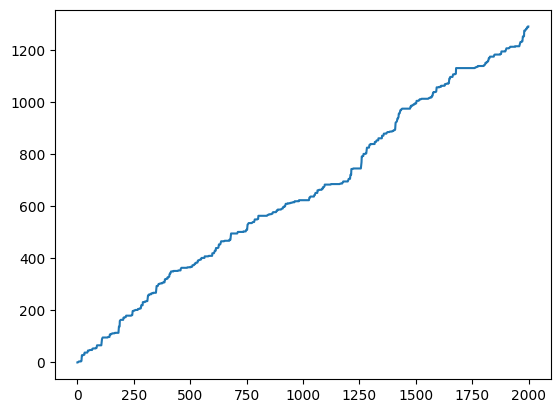

In [9]:
activities[activities['product'] == 'AMETHYSTS']['profit_and_loss'].plot()

<Axes: >

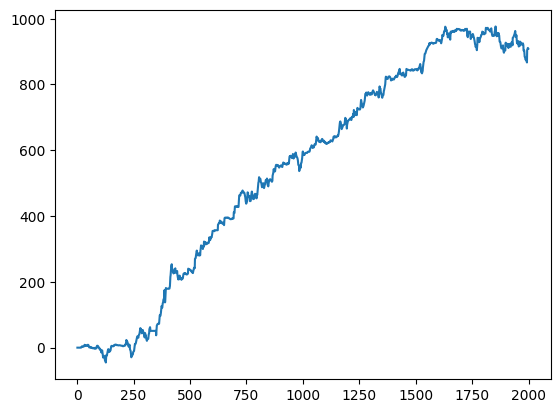

In [10]:
activities[activities['product'] == 'STARFRUIT']['profit_and_loss'].plot()

In [11]:
activities[activities['product'] == 'AMETHYSTS']

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,0,0,AMETHYSTS,9998,9,9995.0,23.0,NaN,NaN,10005,23,NaN,NaN,NaN,NaN,10001.5,0.0
2,0,100,AMETHYSTS,10002,1,10000.0,2.0,9998.0,4.0,10004,1,10005.0,21.0,NaN,NaN,10003.0,0.0
4,0,200,AMETHYSTS,9996,1,9995.0,21.0,NaN,NaN,10004,1,10005.0,21.0,NaN,NaN,10000.0,2.0
7,0,300,AMETHYSTS,9995,26,NaN,NaN,NaN,NaN,10005,26,NaN,NaN,NaN,NaN,10000.0,4.0
8,0,400,AMETHYSTS,9998,8,9996.0,2.0,9995.0,26.0,10004,2,10005.0,26.0,NaN,NaN,10001.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990,0,99500,AMETHYSTS,9995,20,NaN,NaN,NaN,NaN,9998,3,10005.0,20.0,NaN,NaN,9996.5,1282.0
1992,0,99600,AMETHYSTS,9995,28,NaN,NaN,NaN,NaN,10005,28,NaN,NaN,NaN,NaN,10000.0,1288.0
1995,0,99700,AMETHYSTS,9995,26,NaN,NaN,NaN,NaN,10005,26,NaN,NaN,NaN,NaN,10000.0,1288.0
1996,0,99800,AMETHYSTS,9996,1,9995.0,25.0,NaN,NaN,10002,5,10004.0,1.0,10005.0,25.0,9999.0,1292.0


In [12]:
activities[activities['product'] == 'STARFRUIT']

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
1,0,0,STARFRUIT,5036,23,NaN,NaN,NaN,NaN,5043,23,NaN,NaN,NaN,NaN,5039.5,0.000000
3,0,100,STARFRUIT,5042,1,5039.0,2.0,5037.0,1.0,5043,22,NaN,NaN,NaN,NaN,5042.5,0.000000
5,0,200,STARFRUIT,5037,1,5036.0,21.0,NaN,NaN,5043,1,5044.0,21.0,NaN,NaN,5040.0,0.000000
6,0,300,STARFRUIT,5042,1,5037.0,26.0,NaN,NaN,5044,26,NaN,NaN,NaN,NaN,5043.0,0.000000
9,0,400,STARFRUIT,5037,28,NaN,NaN,NaN,NaN,5044,28,NaN,NaN,NaN,NaN,5040.5,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991,0,99500,STARFRUIT,5049,20,NaN,NaN,NaN,NaN,5056,20,NaN,NaN,NaN,NaN,5052.5,873.328125
1993,0,99600,STARFRUIT,5049,28,NaN,NaN,NaN,NaN,5056,28,NaN,NaN,NaN,NaN,5052.5,867.023438
1994,0,99700,STARFRUIT,5050,26,NaN,NaN,NaN,NaN,5057,26,NaN,NaN,NaN,NaN,5053.5,904.820312
1997,0,99800,STARFRUIT,5051,1,5050.0,25.0,NaN,NaN,5057,26,NaN,NaN,NaN,NaN,5054.0,911.226562


In [13]:
trade_history[trade_history['buyer'] == 'SUBMISSION']

,timestamp,buyer,seller,symbol,currency,price,quantity
8,800,SUBMISSION,,AMETHYSTS,SEASHELLS,9998,1
9,800,SUBMISSION,,STARFRUIT,SEASHELLS,5039,3
10,800,SUBMISSION,,STARFRUIT,SEASHELLS,5039,1
11,900,SUBMISSION,,AMETHYSTS,SEASHELLS,9998,11
12,1200,SUBMISSION,,STARFRUIT,SEASHELLS,5037,1
...,...,...,...,...,...,...,...
706,99300,SUBMISSION,,AMETHYSTS,SEASHELLS,9998,1
708,99500,SUBMISSION,,AMETHYSTS,SEASHELLS,9998,3
710,99700,SUBMISSION,,AMETHYSTS,SEASHELLS,9998,2
711,99700,SUBMISSION,,STARFRUIT,SEASHELLS,5052,2


In [14]:
trade_history[trade_history['seller'] == 'SUBMISSION']

,timestamp,buyer,seller,symbol,currency,price,quantity
0,100,,SUBMISSION,AMETHYSTS,SEASHELLS,10002,1
2,200,,SUBMISSION,AMETHYSTS,SEASHELLS,10002,1
13,1300,,SUBMISSION,AMETHYSTS,SEASHELLS,10002,1
16,1500,,SUBMISSION,STARFRUIT,SEASHELLS,5041,1
19,2600,,SUBMISSION,AMETHYSTS,SEASHELLS,10002,1
...,...,...,...,...,...,...,...
695,98000,,SUBMISSION,AMETHYSTS,SEASHELLS,10002,5
701,98600,,SUBMISSION,AMETHYSTS,SEASHELLS,10002,9
702,98900,,SUBMISSION,AMETHYSTS,SEASHELLS,10002,9
703,98900,,SUBMISSION,AMETHYSTS,SEASHELLS,10002,2


C:\Users\aeali\AppData\Local\Temp\ipykernel_13724\2810643684.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dta = trade_history[trade_history['seller'] != 'SUBMISSION'][trade_history['buyer'] != 'SUBMISSION'][trade_history['symbol'] == 'AMETHYSTS']['quantity']
C:\Users\aeali\AppData\Local\Temp\ipykernel_13724\2810643684.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dta = trade_history[trade_history['seller'] != 'SUBMISSION'][trade_history['buyer'] != 'SUBMISSION'][trade_history['symbol'] == 'AMETHYSTS']['quantity']


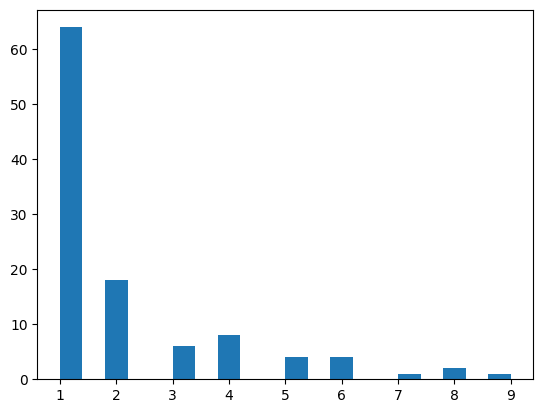

In [26]:
dta = trade_history[trade_history['seller'] != 'SUBMISSION'][trade_history['buyer'] != 'SUBMISSION'][trade_history['symbol'] == 'AMETHYSTS']['quantity']
plt.hist(dta, bins=20)
plt.show()

C:\Users\aeali\AppData\Local\Temp\ipykernel_13724\4200217446.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dta = trade_history[trade_history['seller'] != 'SUBMISSION'][trade_history['buyer'] != 'SUBMISSION'][trade_history['symbol'] == 'STARFRUIT']['quantity']
C:\Users\aeali\AppData\Local\Temp\ipykernel_13724\4200217446.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dta = trade_history[trade_history['seller'] != 'SUBMISSION'][trade_history['buyer'] != 'SUBMISSION'][trade_history['symbol'] == 'STARFRUIT']['quantity']


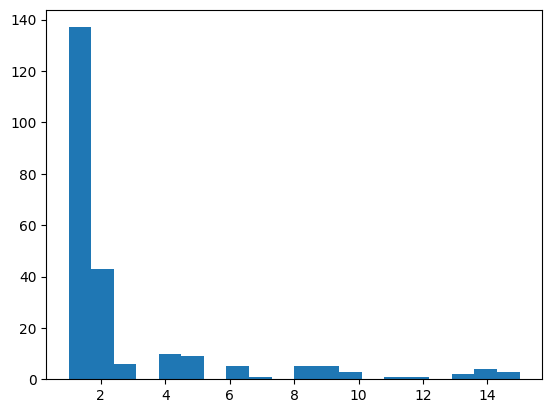

In [27]:
dta = trade_history[trade_history['seller'] != 'SUBMISSION'][trade_history['buyer'] != 'SUBMISSION'][trade_history['symbol'] == 'STARFRUIT']['quantity']
plt.hist(dta, bins=20)
plt.show()